# Introduction to Large Language Models : Word Embeddings


## Representing Words Numerically

Representing a word as a numerical vector is usually called an embedding.  A easy to read introduction to this comcept is at [Understanding Word Embedding Arithmetic]().

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

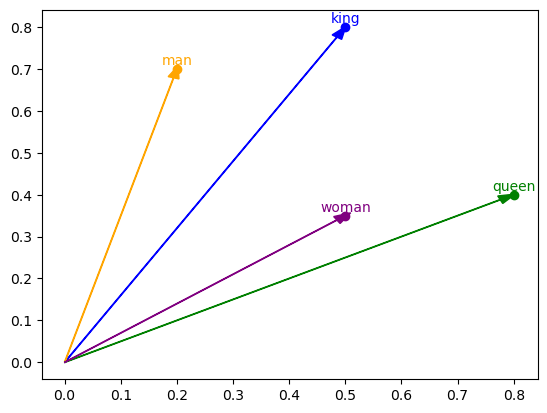

In [2]:
king = np.array([0.5, 0.8])
man = np.array([0.2, 0.7])
queen =  np.array([0.8, .4])
woman = np.array([0.5, 0.35])

def plot(xy, label, color):
    plt.plot(xy[0], xy[1], 'o', color=color)
    plt.arrow(0, 0, xy[0] * 0.97, xy[1] * 0.97, head_width=0.02, color=color)
    plt.annotate(label, xy + [0, 0.01], ha='center', color=color)

colors = ['blue', 'orange', 'green', 'purple']
plot(king, 'king', colors[0])
plot(man, 'man', colors[1])
plot(queen, 'queen', colors[2])
plot(woman, 'woman', colors[3])


The cosine of the angle between two vectors is often used as a measure of the similarity of two vectors.

Let $\theta$ be the angle between two vectors, $v_1$ and $v_2$.  If the two vectors are equal, the angle is zero and the cosine of the angle is 1.  If the two vectors are perpendicular, the angle is 90 degrees and the cosine is 0.  If one vector is the negative of the other, the angle is 180 degrees and the cosine is -1.

$$ \begin{eqnarray}
v_1 \cdot v_2 &= ||v_1|| ||v_2|| \cos(\theta)\\
\cos(\theta) &= \frac{v_1 \cdot v_2}{||v_1|| ||v_2||}
\end{eqnarray}$$

In [3]:
def similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

vectors_labels = list(zip([king, queen, man, woman],
                          ['king', 'queen', 'man', 'woman']))
print(vectors_labels)

print(f'The similarity between')
for v, label in vectors_labels:
    for v2, label2 in vectors_labels:
        print(f'  {label} and {label2} is {similarity(v, v2)}')

[(array([0.5, 0.8]), 'king'), (array([0.8, 0.4]), 'queen'), (array([0.2, 0.7]), 'man'), (array([0.5 , 0.35]), 'woman')]
The similarity between
  king and king is 1.0
  king and queen is 0.8532818336519589
  king and man is 0.9609725834417835
  king and woman is 0.9204871449227451
  queen and king is 0.8532818336519589
  queen and queen is 1.0
  queen and man is 0.6757246285173464
  queen and woman is 0.9892034623538708
  man and king is 0.9609725834417835
  man and queen is 0.6757246285173464
  man and man is 1.0000000000000002
  man and woman is 0.7764580943901146
  woman and king is 0.9204871449227451
  woman and queen is 0.9892034623538708
  woman and man is 0.7764580943901146
  woman and woman is 1.0


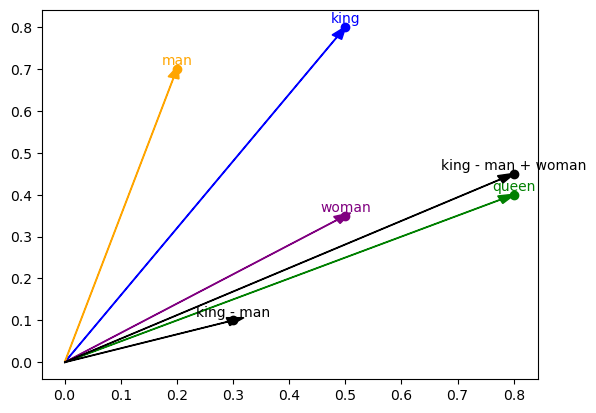

In [4]:
colors = ['blue', 'orange', 'green', 'purple']
plot(king, 'king', colors[0])
plot(man, 'man', colors[1])
plot(queen, 'queen', colors[2])
plot(woman, 'woman', colors[3])

plot(king - man, 'king - man', 'black')
plot(king - man + woman, 'king - man + woman', 'black')

In [5]:
print(f'The similarity between man - king + woman and king is {similarity(king - man + woman, king)}')
print(f'The similarity between man - king + woman and queen is {similarity(king - man + woman, queen)}')


The similarity between man - king + woman and king is 0.8776748105365554
The similarity between man - king + woman and queen is 0.9988123511248966


## Word2Vec

The following code is adapted from [Word2Vec Model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)

In [6]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [7]:
datapath('lee_background.cor')

'/s/parsons/e/fac/anderson/anaconda3/lib/python3.11/site-packages/gensim/test/test_data/lee_background.cor'

In [8]:
!head -2 /s/parsons/e/fac/anderson/anaconda3/lib/python3.11/site-packages/gensim/test/test_data/lee_background.cor

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [9]:
import gensim.models

sentences = MyCorpus()

start_time = time.time()
model = gensim.models.Word2Vec(sentences=sentences, vector_size=200, window=3, epochs=100, min_count=1)
elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds')

Training took 7.60 seconds


In [10]:
model

In [11]:
wv = model.wv

In [12]:
len(model.wv.index_to_key)

6981

In [13]:
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/6981 is the
word #1/6981 is to
word #2/6981 is of
word #3/6981 is in
word #4/6981 is and
word #5/6981 is he
word #6/6981 is is
word #7/6981 is for
word #8/6981 is on
word #9/6981 is said


In [14]:
wv.most_similar(positive=['car'], topn=5)

[('boston', 0.4497169852256775),
 ('explosives', 0.4384377896785736),
 ('isolated', 0.4346270263195038),
 ('northside', 0.4276871681213379),
 ('blood', 0.4154920279979706)]

In [15]:
wv.most_similar(positive=['king'], topn=5)

[('juan', 0.7906243801116943),
 ('haji', 0.7587261199951172),
 ('carlos', 0.7229064702987671),
 ('qanooni', 0.6979995369911194),
 ('student', 0.6909735202789307)]

In [16]:
wv.doesnt_match(['king', 'queen', 'car'])

'car'

The similarity among the vacabulary workds, we can plot them in a 2-dimensional plane at relative positions that relate to their similarities.  We can use [t-SNE](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html) to project the word embeddings vectors to 2 dimensions and use [plotly](https://plotly.com/python/) to create an interactive plot.

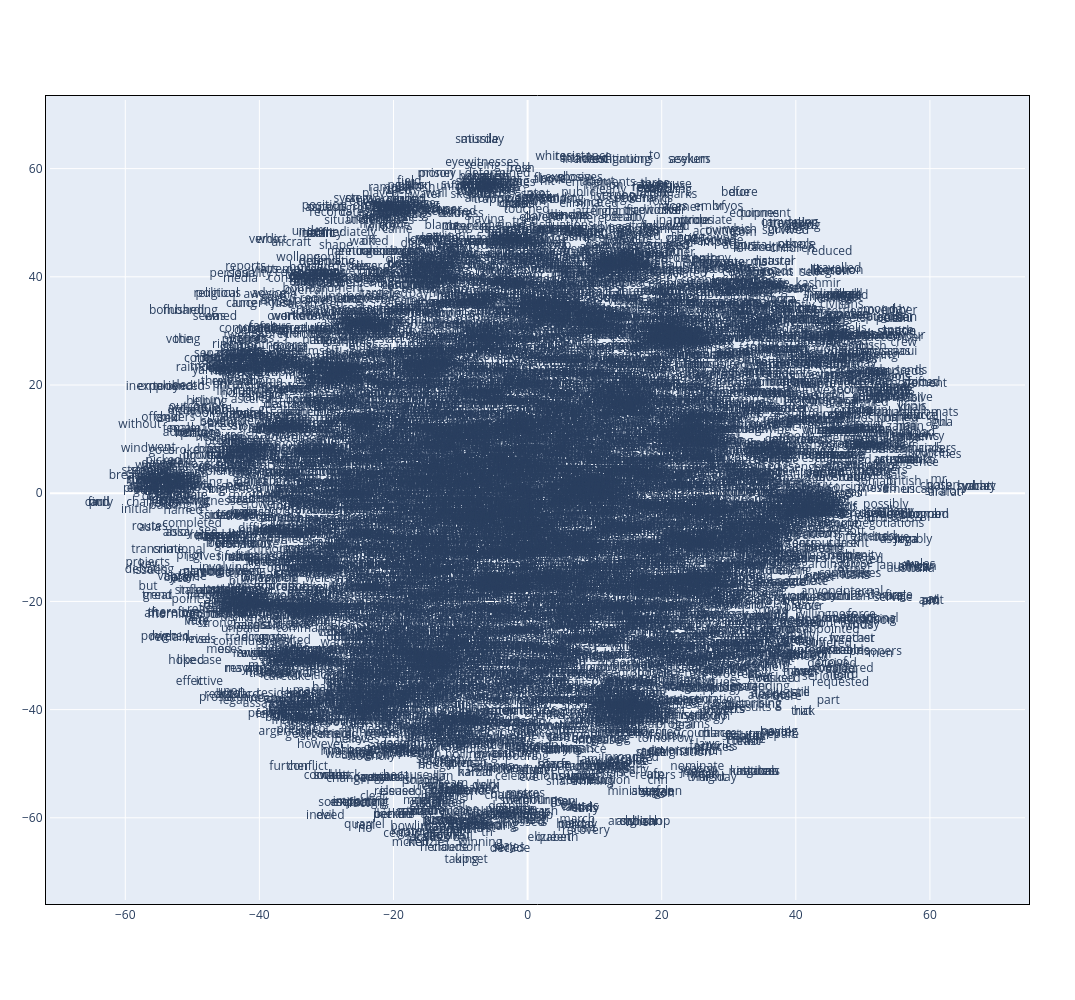

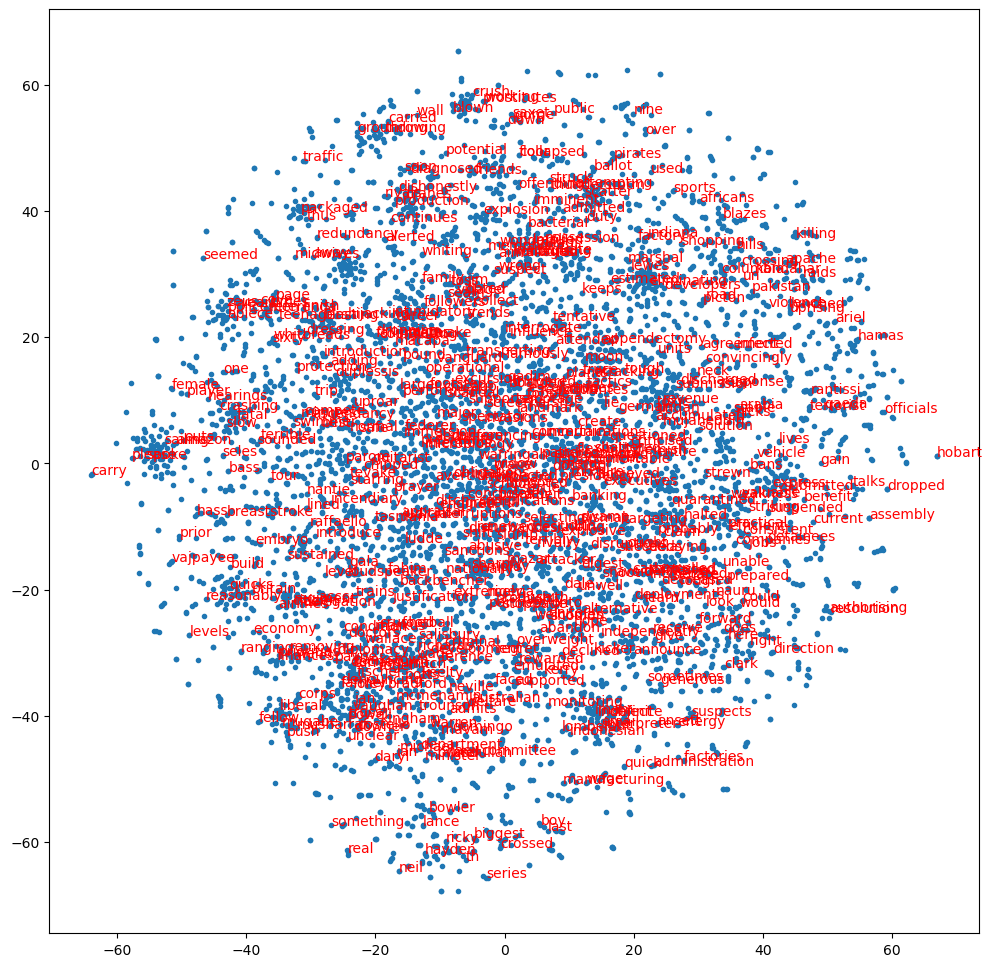

In [24]:
from sklearn.manifold import TSNE 

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    layout = go.Layout(
        autosize=False,
        width=1000,
        height=1000,
        xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
        yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
        margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    )

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot({'data': data, 'layout': layout}, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals, marker='.')
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 500)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]), color='red')

plot_with_plotly(x_vals, y_vals, labels)

plot_with_matplotlib(x_vals, y_vals, labels)

In class we talked about using our `neuralnetworksA4.py` code to construct an autoencoder network to project data into a small number of dimensions.  We used two units in a middle hidden layer to project data into two dimensions.  

[This site](https://n8python.github.io/mnistLatentSpace/) is a cool interactive demo of the two-dimensional space that results for the MNIST digits.